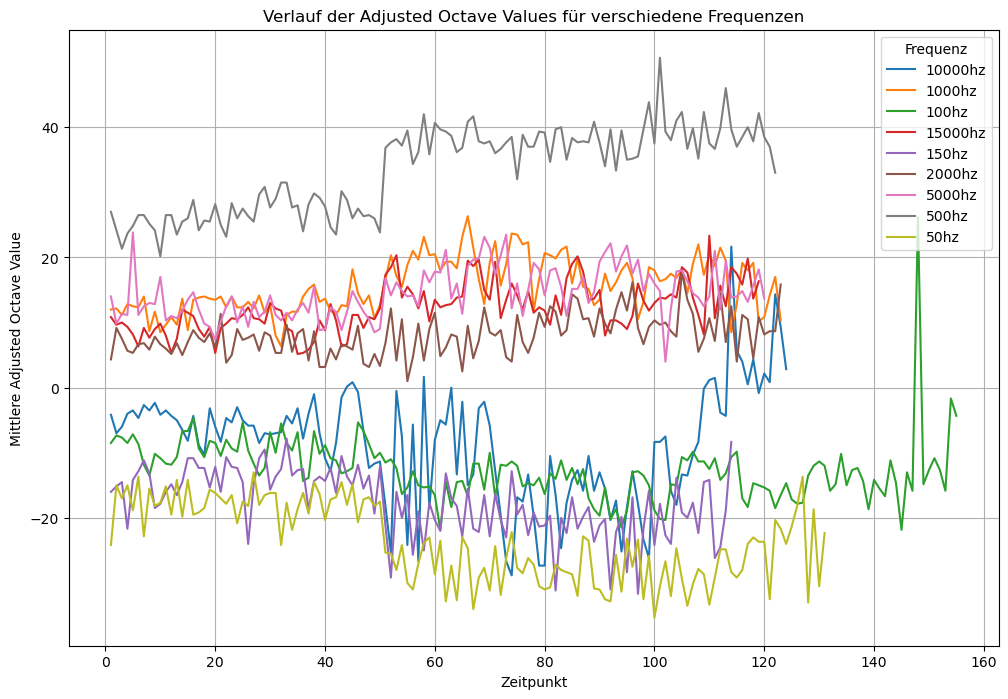

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Pfad zum Verzeichnis der CSV-Dateien
directory_path = '../data'

# Liste für alle DataFrames
data_frames = []

# Einlesen aller CSV-Dateien und Transformation der Daten
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # CSV-Datei einlesen
        df = pd.read_csv(os.path.join(directory_path, filename))
        
        # Hinzufügen einer Spalte für den Zeitpunkt, basierend auf den Durchläufen von Index 2 bis 7
        df['Timepoint'] = (df.index // 6) + 1  # Jeder Block von 6 Zeilen ist ein Zeitpunkt (0-basiert, daher +1)
        
        # Spalte für die Frequenz aus dem Dateinamen extrahieren
        frequency = filename.replace('.csv', '')
        df['Frequency'] = frequency
        
        # DataFrame zur Liste hinzufügen
        data_frames.append(df)

# Alle DataFrames zusammenführen
full_df = pd.concat(data_frames)
statistics_df = pivot_df.describe().T 
# Pivoting der Daten für die Visualisierung: Mittelwert der 'AdjustedOctaveValue' für jede Frequenz und jeden Zeitpunkt
pivot_df = full_df.pivot_table(index='Timepoint', columns='Frequency', values='AdjustedOctaveValue', aggfunc='mean')

# Visualisierung
plt.figure(figsize=(12, 8))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.title('Verlauf der Adjusted Octave Values für verschiedene Frequenzen')
plt.xlabel('Zeitpunkt')
plt.ylabel('Mittlere Adjusted Octave Value')
plt.legend(title='Frequenz')
plt.grid(True)
plt.savefig('octaves.png')
plt.show()

In [6]:
statistics_df.to_csv('statistics.csv')
statistics_df

,count,mean,std,min,25%,50%,75%,max
Frequency,,,,,,,,
10000hz,124.0,-8.595430,8.745683,-28.833333,-13.375000,-7.000000,-3.500000,21.666667
1000hz,123.0,15.609756,4.095336,6.333333,12.500000,15.166667,19.000000,26.333333
100hz,155.0,-12.563441,4.904105,-21.833333,-15.083333,-12.666667,-10.583333,26.166667
15000hz,119.0,12.278711,3.753599,5.166667,9.833333,11.833333,14.166667,23.333333
150hz,114.0,-17.647661,4.983935,-31.666667,-21.166667,-16.833333,-13.708333,-7.833333
2000hz,123.0,8.065041,3.132737,1.000000,5.666667,7.833333,9.833333,17.833333
5000hz,120.0,14.452778,3.812064,4.000000,11.666667,14.000000,17.375000,23.833333
500hz,122.0,33.460383,6.447038,20.166667,27.125000,35.666667,38.500000,50.666667
50hz,131.0,-23.591603,5.974848,-35.333333,-28.583333,-23.666667,-18.083333,-13.000000
